<a href="https://www.kaggle.com/code/rinichristy/dimensionality-reduction-techniques-in-python?scriptVersionId=91141417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# **Dimensionality reduction techniques in Python**
## **Methods Used:**
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA) 
* Kernel PCA

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

**PCA vs LDA: What to Choose for Dimensionality Reduction?**

In case of uniformly distributed data, LDA almost always performs better than PCA. However if the data is highly skewed (irregularly distributed) then it is advised to use PCA since LDA can be biased towards the majority class.

Finally, it is beneficial that PCA can be applied to labeled as well as unlabeled data since it doesn't rely on the output labels. On the other hand, LDA requires output classes for finding linear discriminants and hence requires labeled data.

**Quadratic discriminant analysis (QDA)**

Quadratic discriminant analysis is a method you can use when you have a set of predictor variables and you’d like to classify a response variable into two or more classes. It is considered to be the non-linear equivalent to linear discriminant analysis.

This method is similar to LDA and also assumes that the observations from each class are normally distributed, but it does not assume that each class shares the same covariance matrix. Instead, QDA assumes that each class has its own covariance matrix.

QDA is generally preferred to LDA in the following situations:

(1) The training set is large.

(2) It’s unlikely that the K classes share a common covariance matrix.

When these conditions hold, QDA tends to perform better since it is more flexible and can provide a better fit to the data.

## **Data Set Information:**

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are:
1. Alcohol
2. Malic acid
3. Ash
4. Alkalinity of ash
5. Magnesium
6. Total phenols
7. Flavanoids
8. Nonflavanoid phenols
9. Proanthocyanins
10. Color intensity
11. Hue
12. )OD280/OD315 of diluted wines
13. Proline

## **Part 1: Data Preprocessing**

### **Importing the libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Importing the dataset**

In [2]:
df = pd.read_csv('../input/uci-wine-dataset/wine.data', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.columns = ['Customer_Segment', 
                 'Alcohol', 
                 'Malic_Acid', 
                 'Ash', 'Ash_Alcanity', 
                 'Magnesium', 
                 'Total_Phenols', 
                 'Flavanoids', 
                 'Nonflavanoid_Phenols', 
                 'Proanthocyanins', 
                 'Color_Intensity', 
                 'Hue', 'OD280', 
                 'Proline']
df.head()

,Customer_Segment,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df =df[['Alcohol','Malic_Acid', 
        'Ash', 'Ash_Alcanity', 
        'Magnesium', 'Total_Phenols', 
        'Flavanoids', 'Nonflavanoid_Phenols', 
        'Proanthocyanins', 'Color_Intensity', 
        'Hue', 'OD280', 
        'Proline', 'Customer_Segment']]
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### **Splitting the dataset into the Training set and Test set**

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Feature Scaling**

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Part 2: Building the Classification Models**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Training the Classification models on the Train set
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

#Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of Logistic Regression Model is  1.0

 Confusion Matrix of Logistic Regression Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 
 Accuracy of K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of K-Nearest Neighbor Model:
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]

 
 Classification Report for K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00      0.92         6

   

## **Part 3: Dimensionality Reduction**

### **Part 3A: Applying Principal Component Analysis (PCA)**

In [9]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_features)
pca_variance = pca.explained_variance_
pca_variance

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

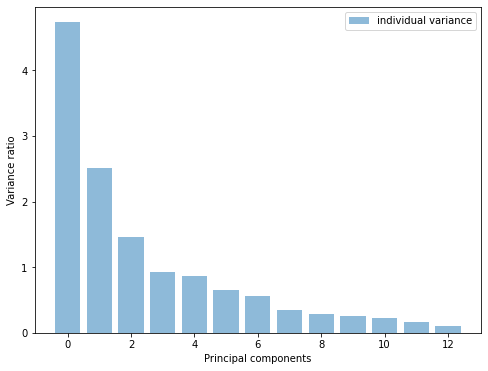

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(range(13), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

Let's convert the features into the 2 top features. We'll then plot a scatter plot of the data point classification based on these 2 features:

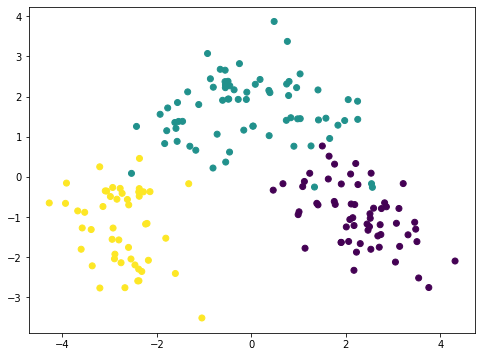

In [11]:
pca2 = PCA(n_components=2)
pca2.fit(X_features)
x_pca = pca2.transform(X_features)

plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Customer_Segment'])
plt.show()

### **PCA on Train Test split data**

In [12]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Implementing PCA with Scikit-Learn
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

#Training the Classification model on the Principal Component Training set
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
# Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of PCA Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for PCA Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of PCA K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of PCA K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for PCA K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of PCA Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of PCA Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for PCA Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of PCA Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of PCA Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for PCA Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of PCA Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of PCA Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for PCA Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of PCA Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  PCA Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for  PCA Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of Logistic Regression Model is  0.9722222222222222

 Confusion Matrix of PCA Logistic Regression Model:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

 
 Classification Report for PCA Logistic Regression Model:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36


 
 Accuracy of PCA K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of PCA K-Nearest Neighbor Model:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

 
 Classification Report for PCA K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00

#### **Visualizing the PCA Train set results**

##### **Using gridspec**

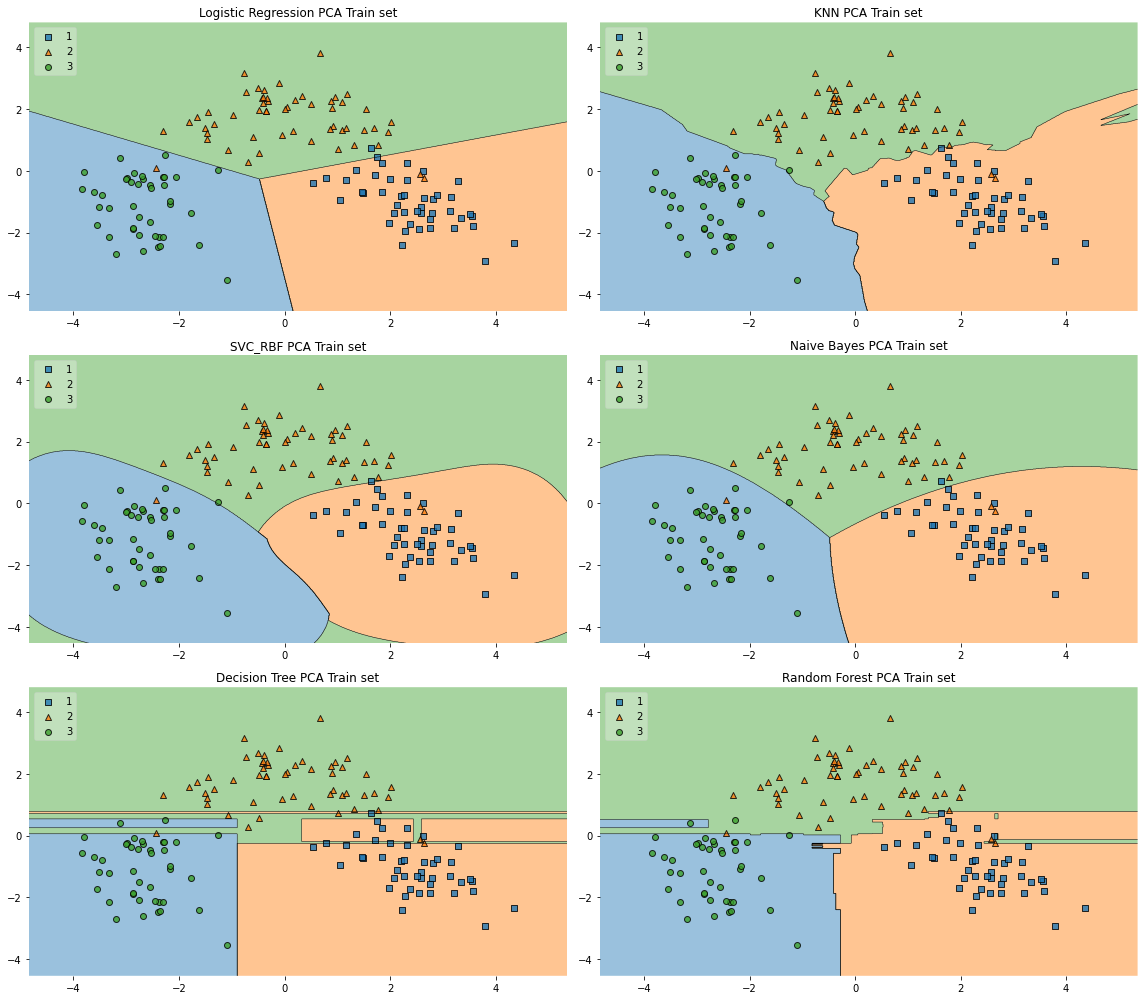

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression PCA Train set', 'KNN PCA Train set', 'SVC_RBF PCA Train set','Naive Bayes PCA Train set', 'Decision Tree PCA Train set', 'Random Forest PCA Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

##### **ListedColormap for Train set**

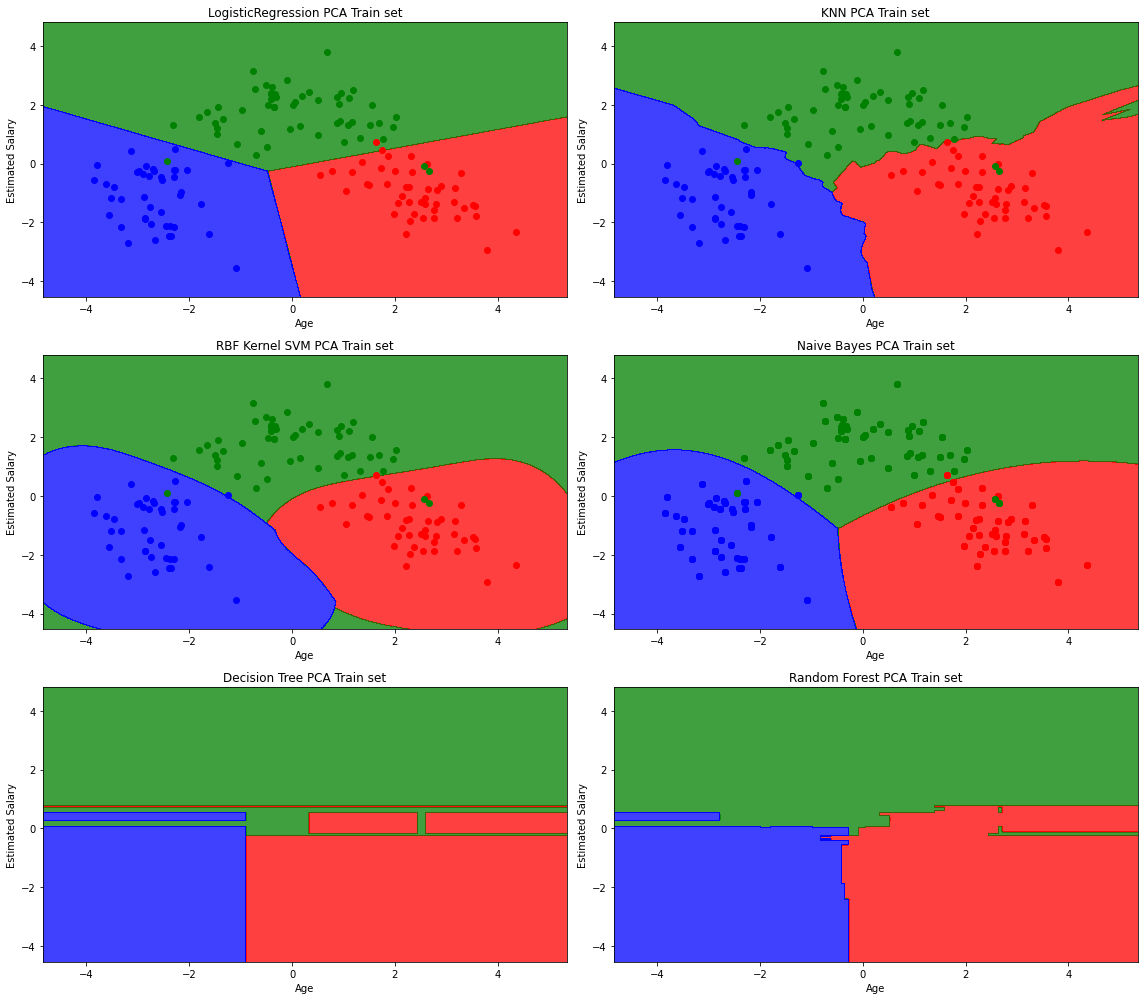

In [14]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression PCA Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN PCA Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM PCA Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes PCA Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree PCA Train set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest PCA Train set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

#### **Visualizing the PCA Test set results**

##### **Using gridspec**

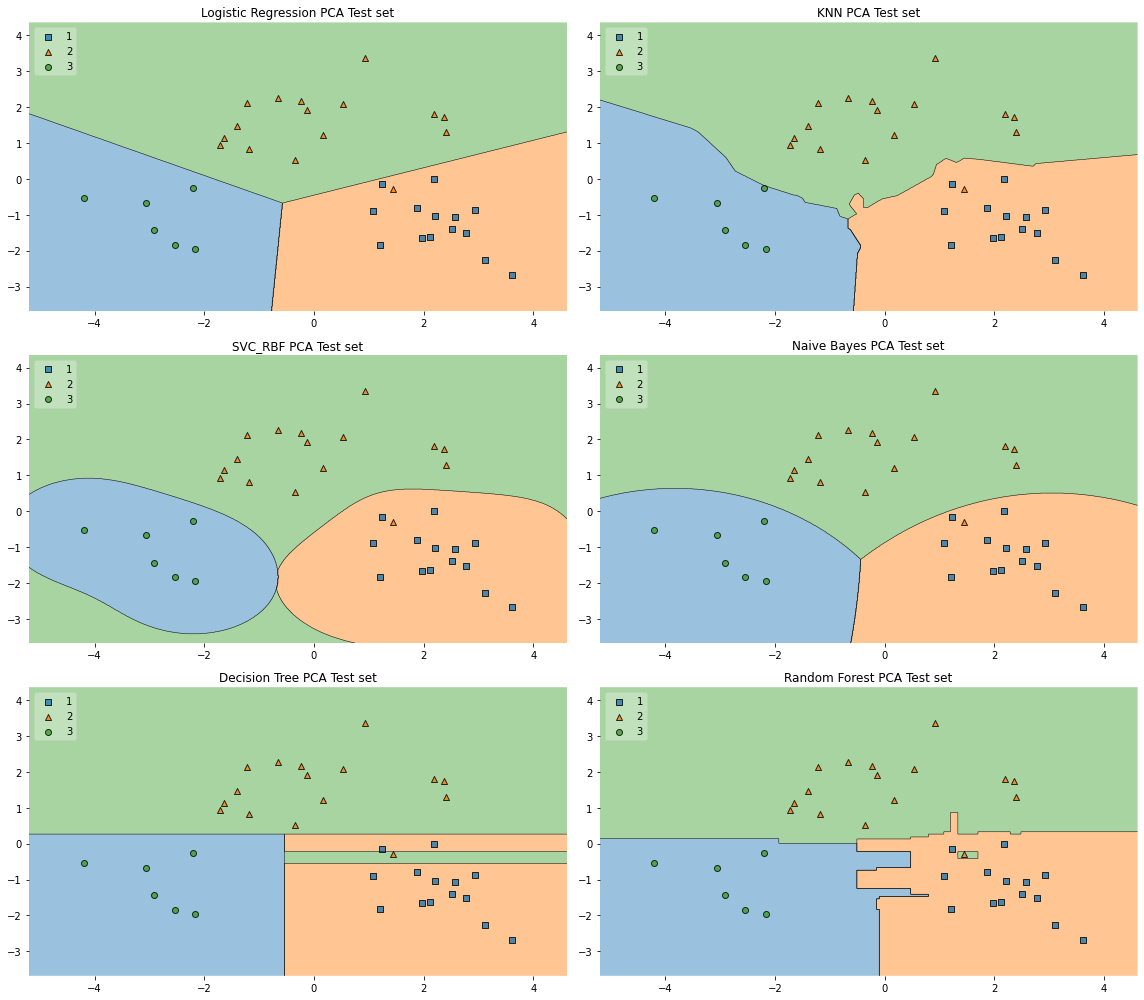

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression PCA Test set', 'KNN PCA Test set', 'SVC_RBF PCA Test set','Naive Bayes PCA Test set', 'Decision Tree PCA Test set', 'Random Forest PCA Test set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

##### **ListedColormap for PCA Test set**

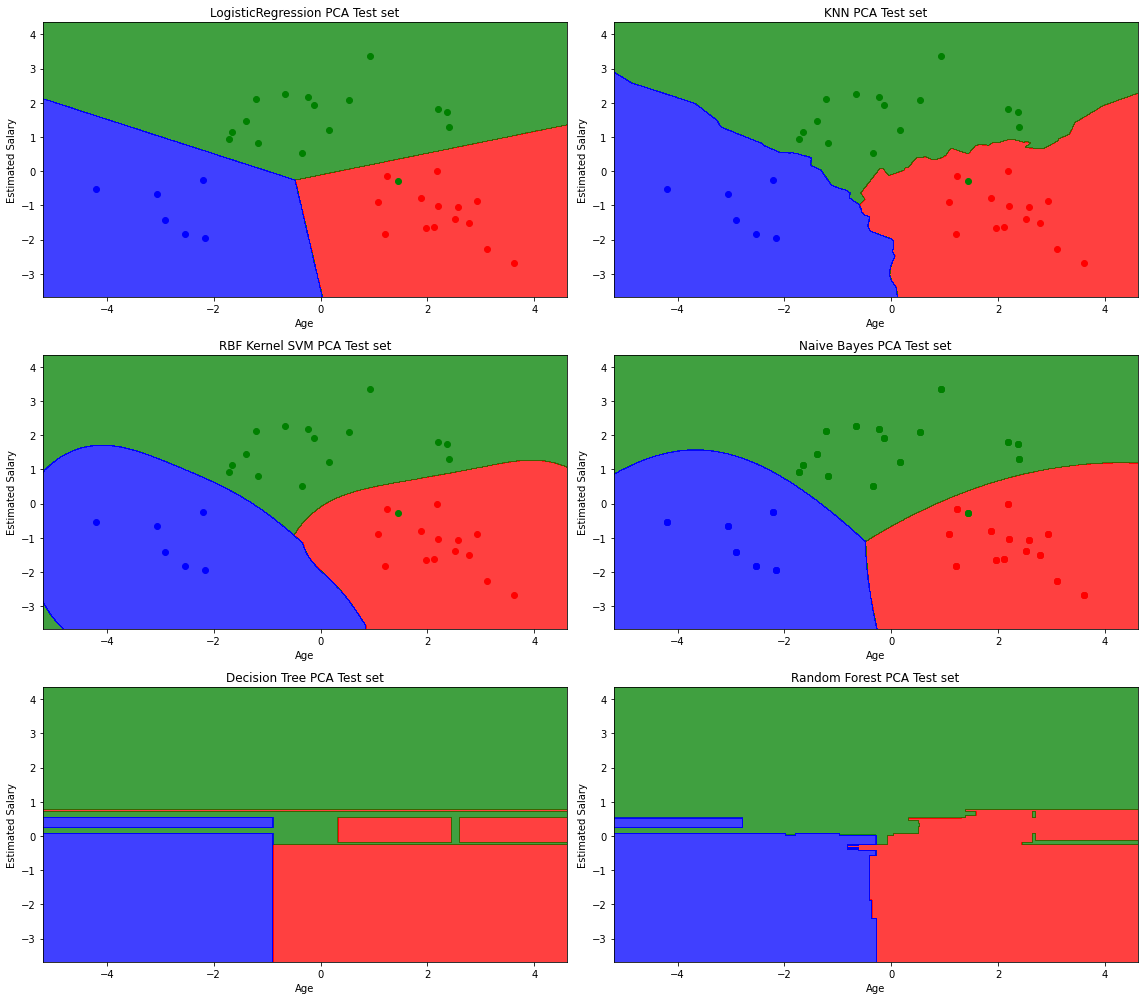

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression PCA Test set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN PCA Test set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM PCA Test set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes PCA Test set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree PCA Test set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest PCA Test set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

### **Part 3B: Performing Linear Discriminant Analysis (LDA)**

In [17]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Implementing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

#Training the Classification model on the Principal Component Training set
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
# Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of LDA Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of LDA Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for LDA Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of LDA K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of LDA K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for LDA K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of LDA Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of LDA Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for LDA Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of LDA Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of LDA Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for LDA Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of LDA Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of LDA Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for LDA Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of LDA Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  LDA Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for LDA Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of LDA Logistic Regression Model is  1.0

 Confusion Matrix of LDA Logistic Regression Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for LDA Logistic Regression Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 
 Accuracy of LDA K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of LDA K-Nearest Neighbor Model:
 [[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

 
 Classification Report for LDA K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16
           3       1.00      1.00 

#### **Visualizing the LDA Train set results**

##### **Using gridspec**

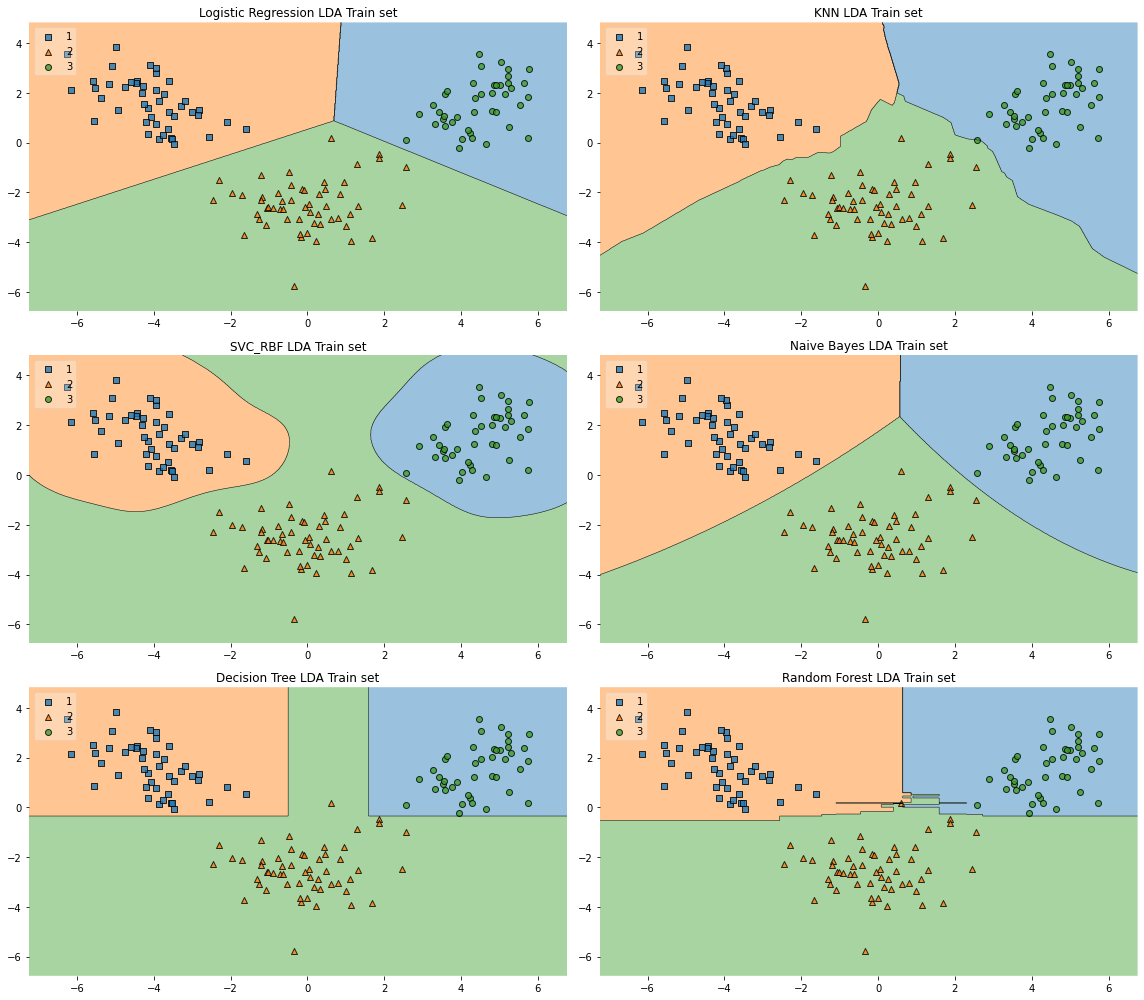

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression LDA Train set', 'KNN LDA Train set', 'SVC_RBF LDA Train set','Naive Bayes LDA Train set', 'Decision Tree LDA Train set', 'Random Forest LDA Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

##### **ListedColormap for LDA Train set**

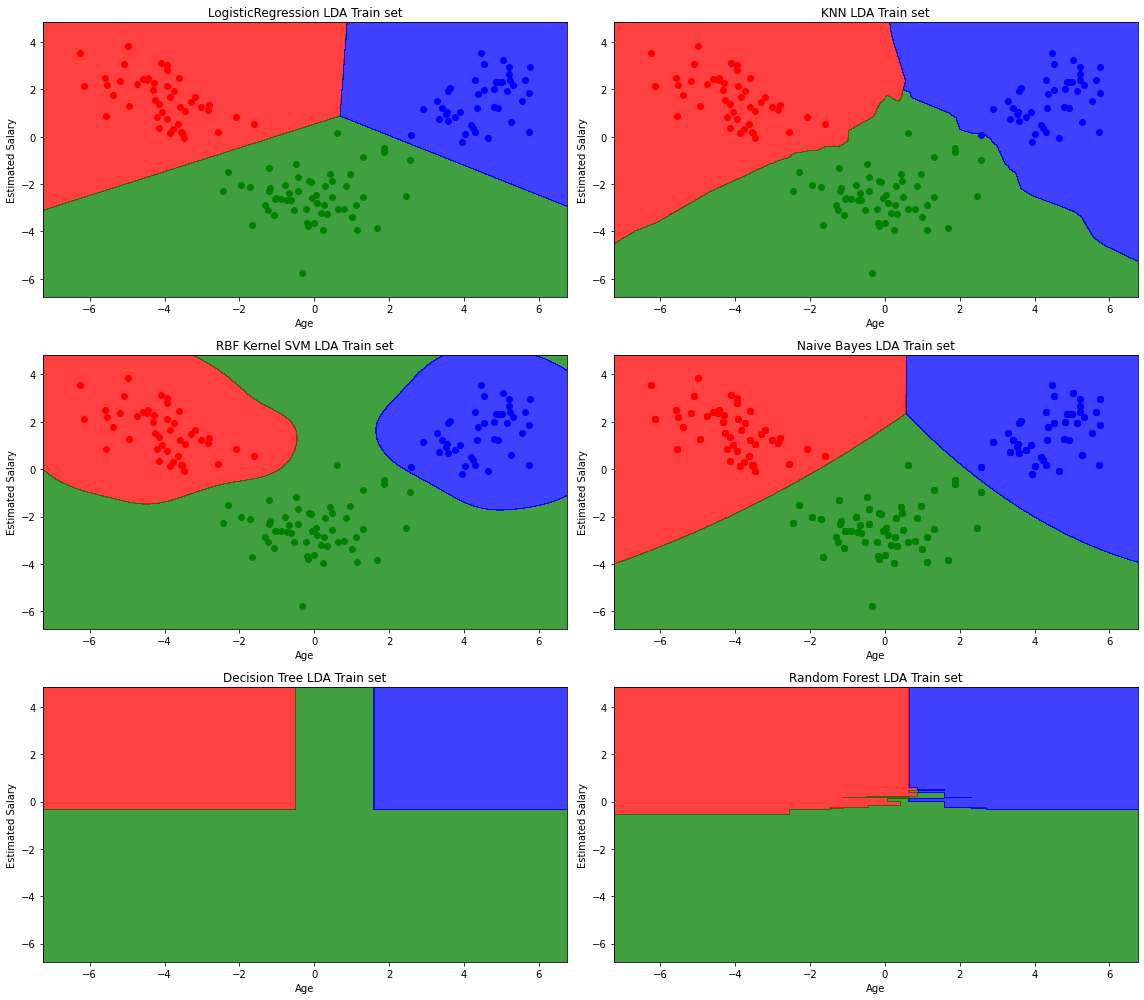

In [19]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression LDA Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN LDA Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM LDA Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes LDA Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree LDA Train set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest LDA Train set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

#### **Visualizing the LDA Test set results**
##### **Using gridspec**

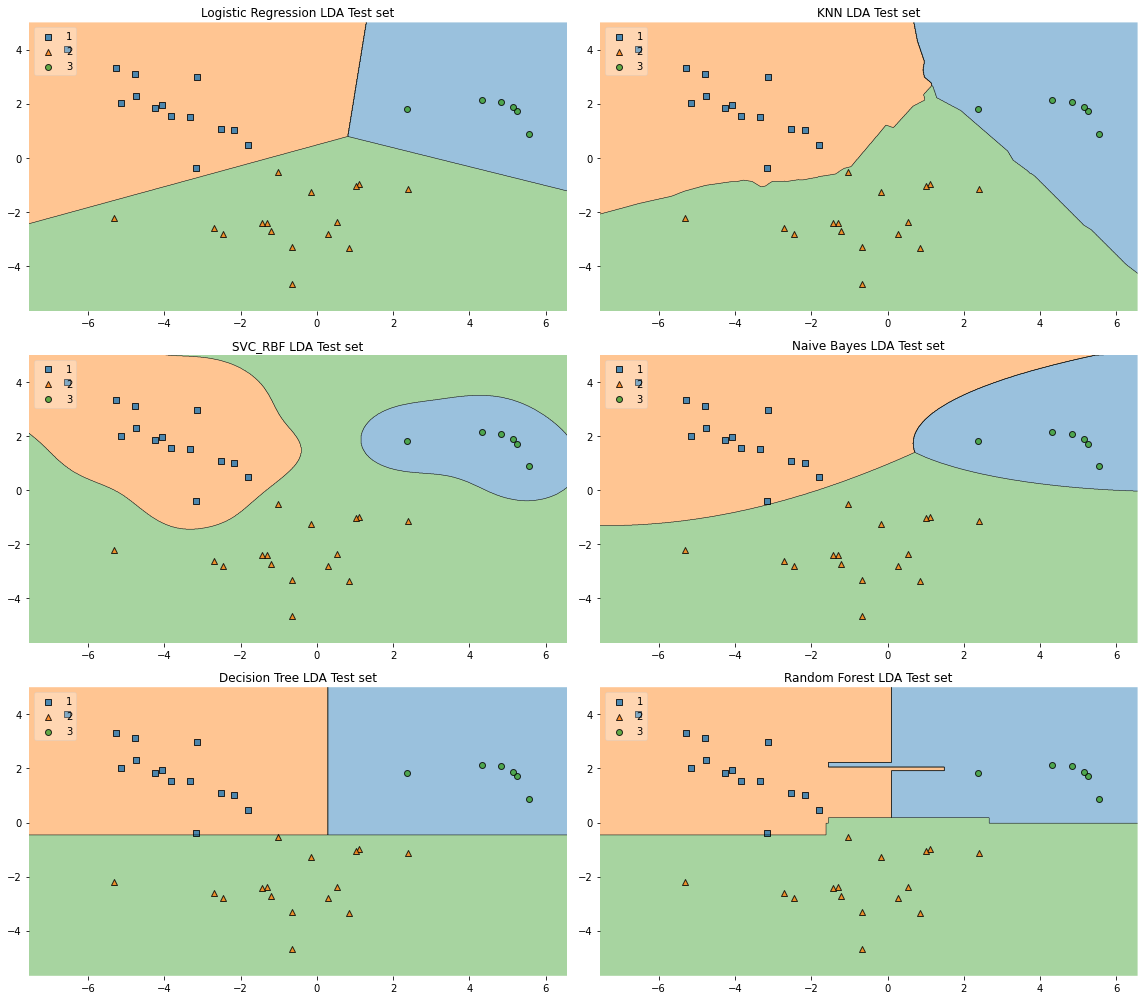

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression LDA Test set', 'KNN LDA Test set', 'SVC_RBF LDA Test set','Naive Bayes LDA Test set', 'Decision Tree LDA Test set', 'Random Forest LDA Test set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

##### **ListedColormap for LDA Test set**

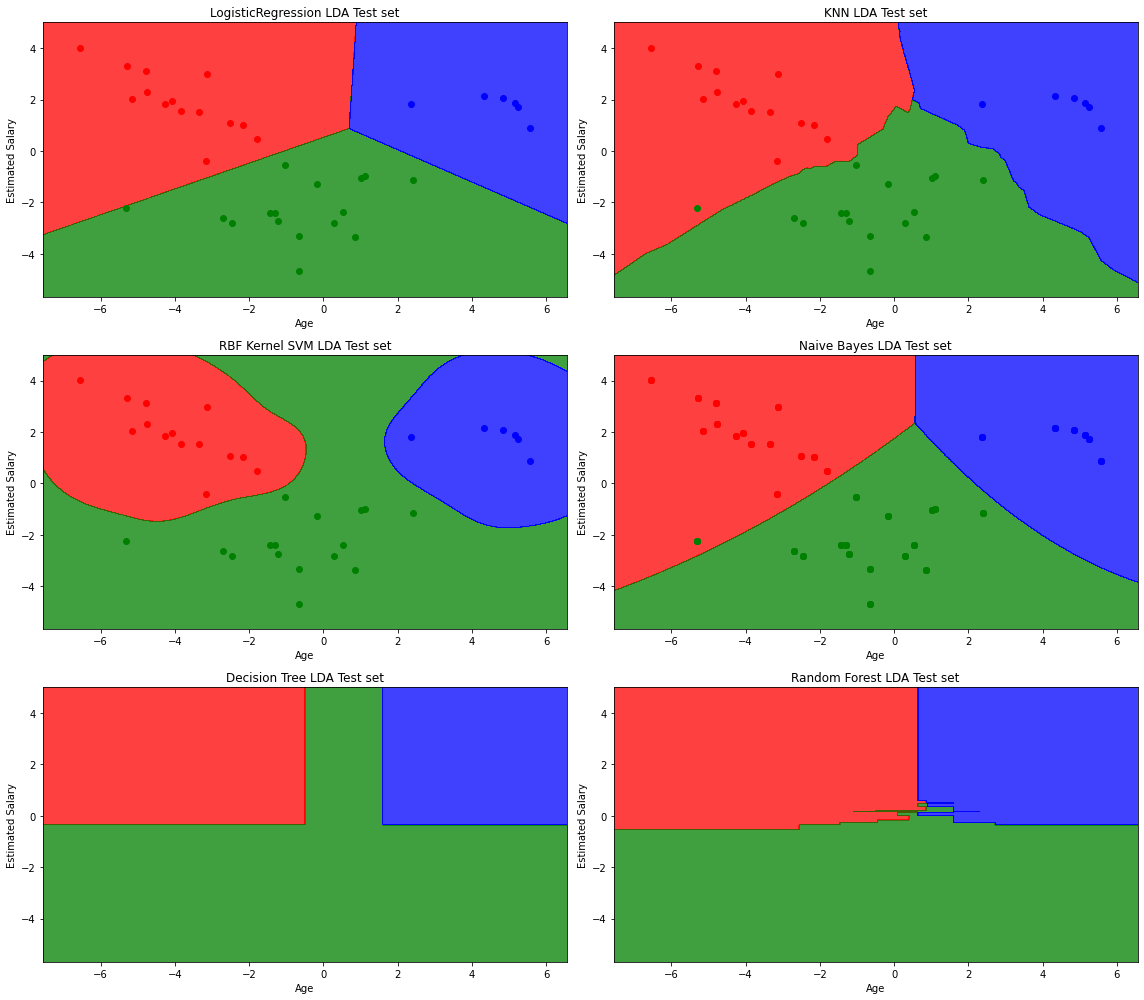

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression LDA Test set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN LDA Test set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM LDA Test set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes LDA Test set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree LDA Test set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest LDA Test set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

### **Part 3C: Applying Quadratic Discriminant Analysis (QDA)**

In [22]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Implementing QDA with Scikit-Learn
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train, y_train)


#Training the Classification model on the Principal Component Training set
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
# Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of QDA Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of QDA Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for QDA Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of QDA K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of QDA K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for QDA K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of QDA Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of QDA Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for QDA Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of QDA Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of QDA Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for QDA Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of QDA Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of QDA Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for QDA Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of QDA Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of  QDA Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for QDA Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of QDA Logistic Regression Model is  1.0

 Confusion Matrix of QDA Logistic Regression Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for QDA Logistic Regression Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 
 Accuracy of QDA K-Nearest Neighbor Model is  0.9722222222222222

 Confusion Matrix of QDA K-Nearest Neighbor Model:
 [[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]

 
 Classification Report for QDA K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.94      0.97        16
           3       0.86      1.00 

### **Part 3D: Performing Kernel Principal Component Analysis (KPCA)**

In [23]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Implementing Kernel PCA with Scikit-Learn
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

#Training the Classification model on the Principal Component Training set
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)
# Predicting the Test set results
y_pred_LR = clf1.predict(X_test)
y_pred_KNN = clf2.predict(X_test)
y_pred_SVC = clf3.predict(X_test)
y_pred_NB = clf4.predict(X_test)
y_pred_DTC = clf5.predict(X_test)
y_pred_RFC = clf6.predict(X_test)

#KEY PERFORMANCE INDICATORS (KPI)
#Generating the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print('Accuracy of KPCA Logistic Regression Model is ', accuracy_score(y_test, y_pred_LR))
print('\n','Confusion Matrix of KPCA Logistic Regression Model:' '\n', confusion_matrix(y_test, y_pred_LR))
print('\n', '\n','Classification Report for KPCA Logistic Regression Model:' '\n',classification_report(y_test, y_pred_LR))
print('\n','\n','Accuracy of KPCA K-Nearest Neighbor Model is ', accuracy_score(y_test, y_pred_KNN))
print('\n','Confusion Matrix of KPCA K-Nearest Neighbor Model:' '\n', confusion_matrix(y_test, y_pred_KNN))
print('\n', '\n','Classification Report for KPCA K-Nearest Neighbor Model:' '\n',classification_report(y_test, y_pred_KNN))
print('\n','\n', 'Accuracy of KPCA Support Vector Classification Model is ', accuracy_score(y_test, y_pred_SVC))
print('\n','Confusion Matrix of KPCA Support Vector Classification Model:' '\n', confusion_matrix(y_test, y_pred_SVC))
print('\n', '\n','Classification Report for KPCA Support Vector Classification Model:' '\n',classification_report(y_test, y_pred_SVC))
print('\n','\n', 'Accuracy of KPCA Naive Bayes Classification  Model is ', accuracy_score(y_test, y_pred_NB))
print('\n','Confusion Matrix of KPCA Naive Bayes Classification  Model:' '\n', confusion_matrix(y_test, y_pred_NB))
print('\n', '\n','Classification Report for KPCA Naive Bayes Classification  Model:' '\n',classification_report(y_test, y_pred_NB))
print('\n','\n', 'Accuracy of KPCA Decision Tree Model is ', accuracy_score(y_test, y_pred_DTC))
print('\n','Confusion Matrix of KPCA Decision Tree Model:' '\n', confusion_matrix(y_test, y_pred_DTC))
print('\n', '\n','Classification Report for KPCA Decision Tree Model:' '\n',classification_report(y_test, y_pred_DTC))
print('\n','\n', 'Accuracy of KPCA Random Forest Model is ', accuracy_score(y_test, y_pred_RFC))
print('\n','Confusion Matrix of KPCA  Random Forest Model:' '\n', confusion_matrix(y_test, y_pred_RFC))
print('\n', '\n','Classification Report for KPCA Random Forest Model:' '\n',classification_report(y_test, y_pred_RFC))

Accuracy of KPCA Logistic Regression Model is  1.0

 Confusion Matrix of KPCA Logistic Regression Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for KPCA Logistic Regression Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


 
 Accuracy of KPCA K-Nearest Neighbor Model is  1.0

 Confusion Matrix of KPCA K-Nearest Neighbor Model:
 [[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

 
 Classification Report for KPCA K-Nearest Neighbor Model:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00

#### **Visualizing the Kernel PCA Train set results**

##### **Using gridspec**

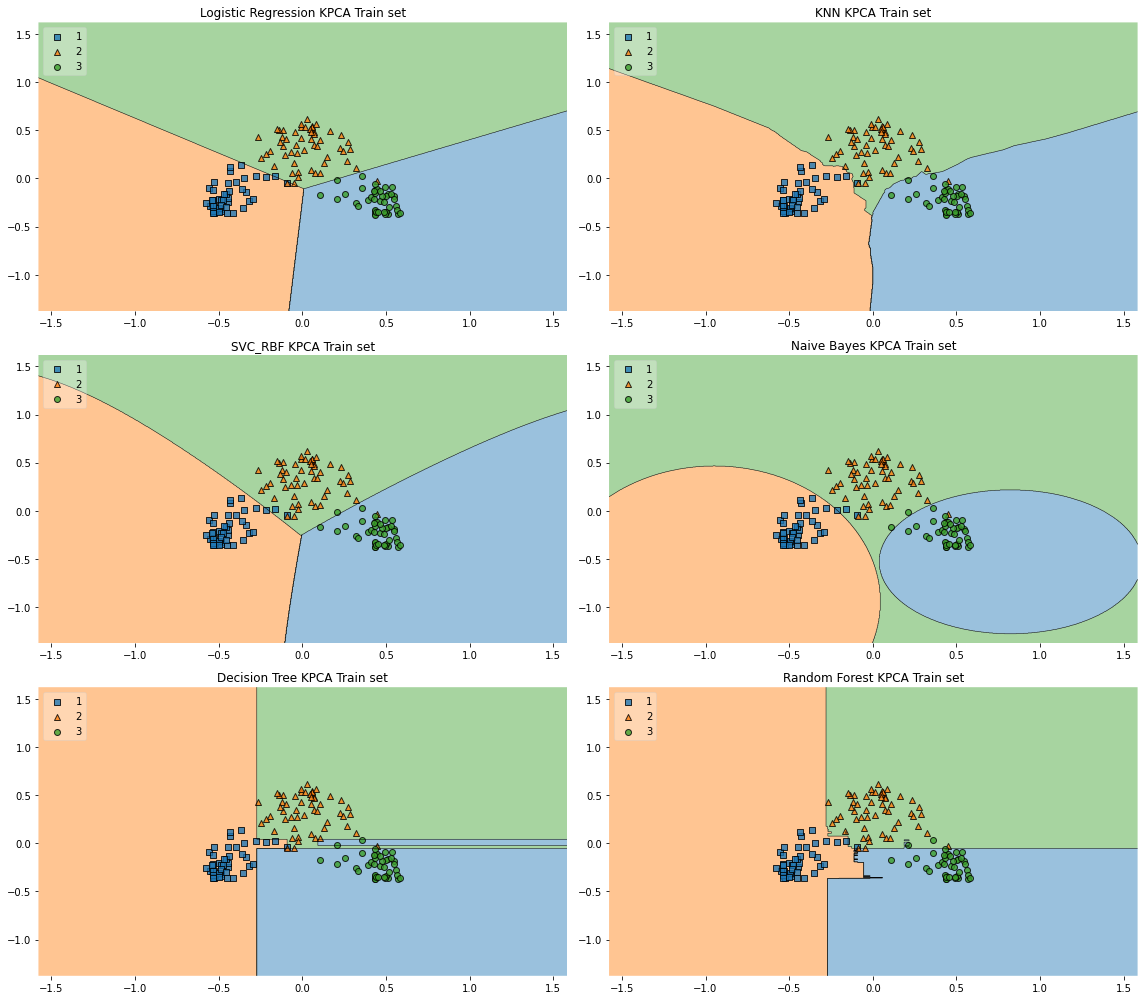

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression KPCA Train set', 'KNN KPCA Train set', 'SVC_RBF KPCA Train set','Naive Bayes KPCA Train set', 'Decision Tree KPCA Train set', 'Random Forest KPCA Train set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

#### **ListedColormap of Kernel PCA Train set**

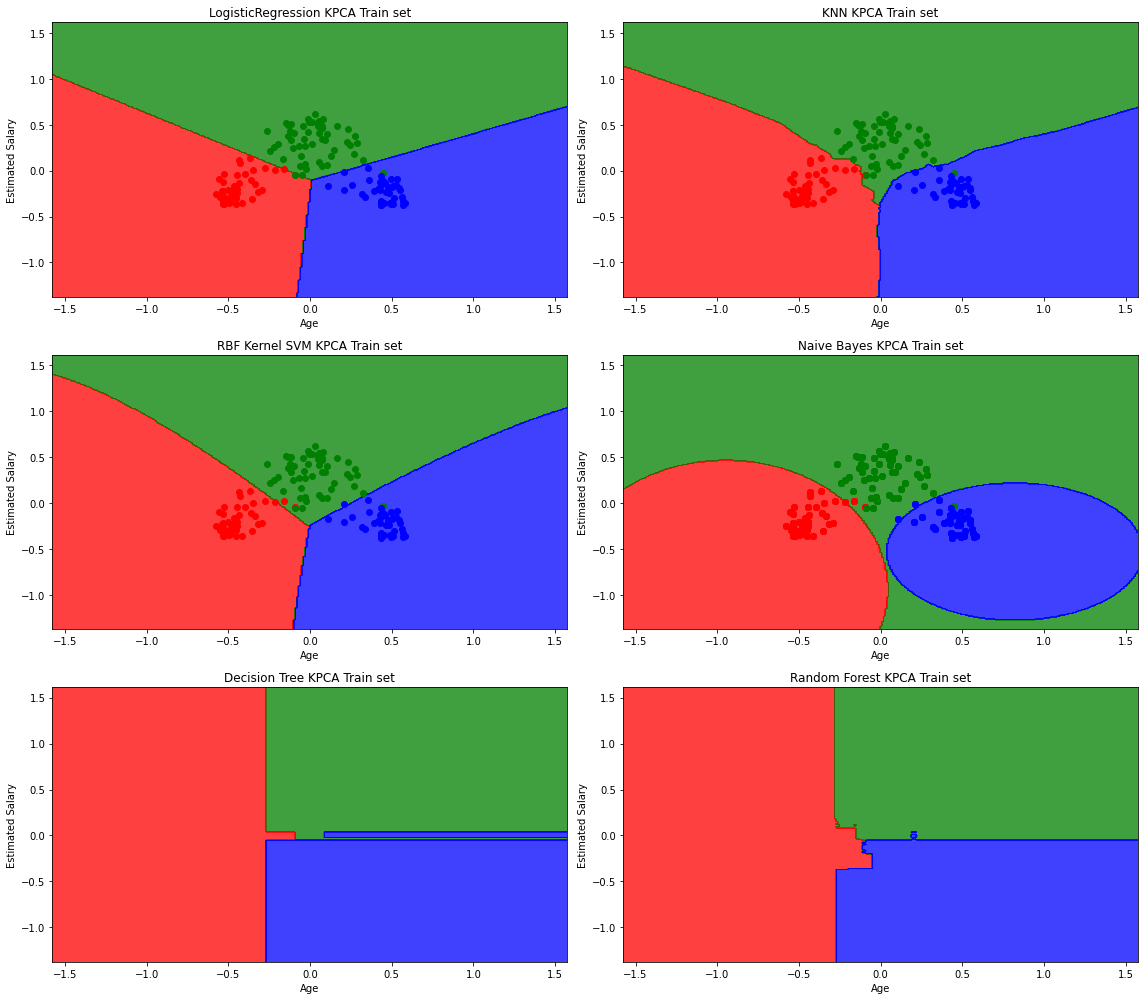

In [25]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression KPCA Train set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN KPCA Train set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM KPCA Train set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes KPCA Train set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree KPCA Train set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest KPCA Train set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();

#### **Visualizing the Kernel PCA Test set results**

##### **Using gridspec**

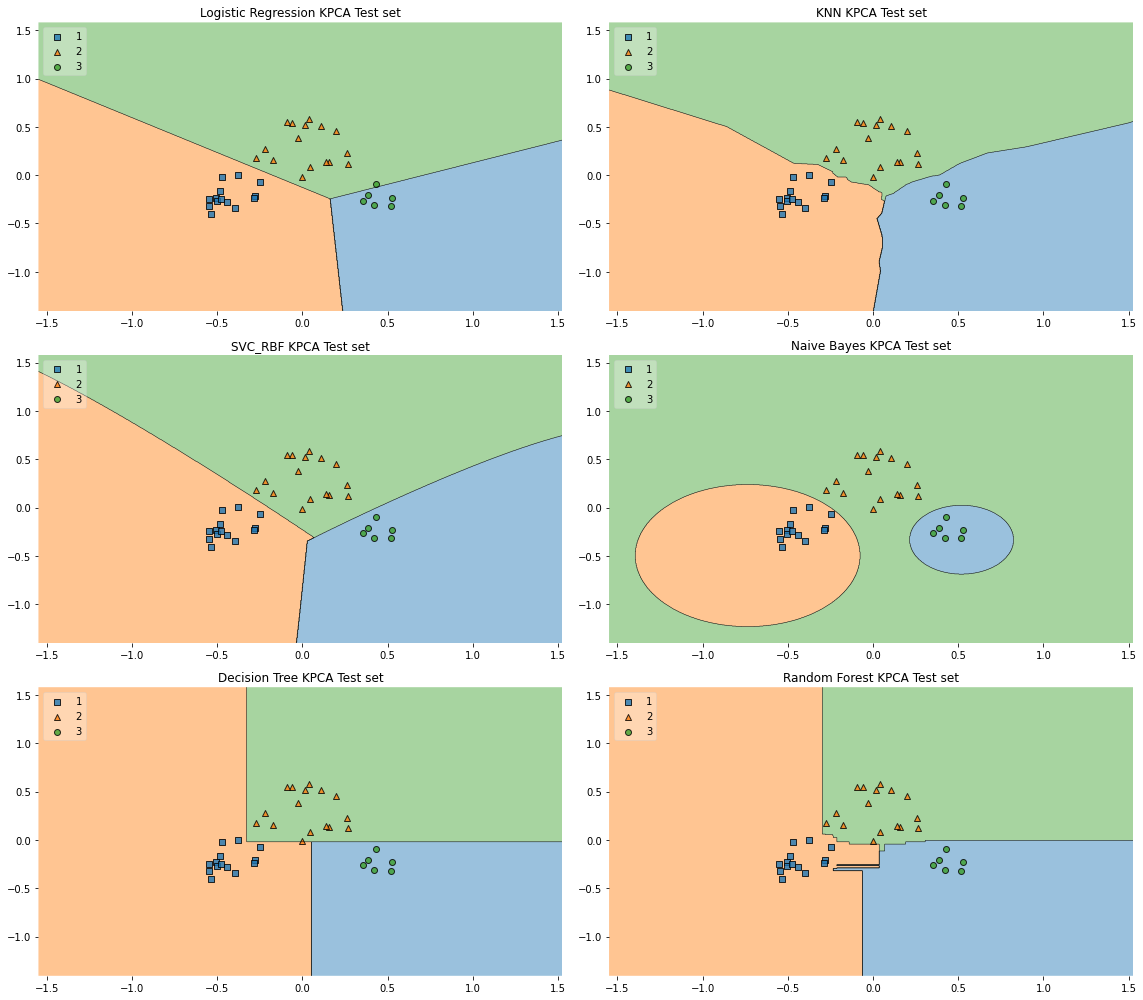

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 2)
 
fig = plt.figure(figsize=(16,14))
 
labels = ['Logistic Regression KPCA Test set', 'KNN KPCA Test set', 'SVC_RBF KPCA Test set','Naive Bayes KPCA Test set', 'Decision Tree KPCA Test set', 'Random Forest KPCA Test set'] 
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6], 
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]): 
 
    clf.fit(X_test, y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
 
plt.tight_layout();

##### **ListedColormap of Kernel PCA Test set**

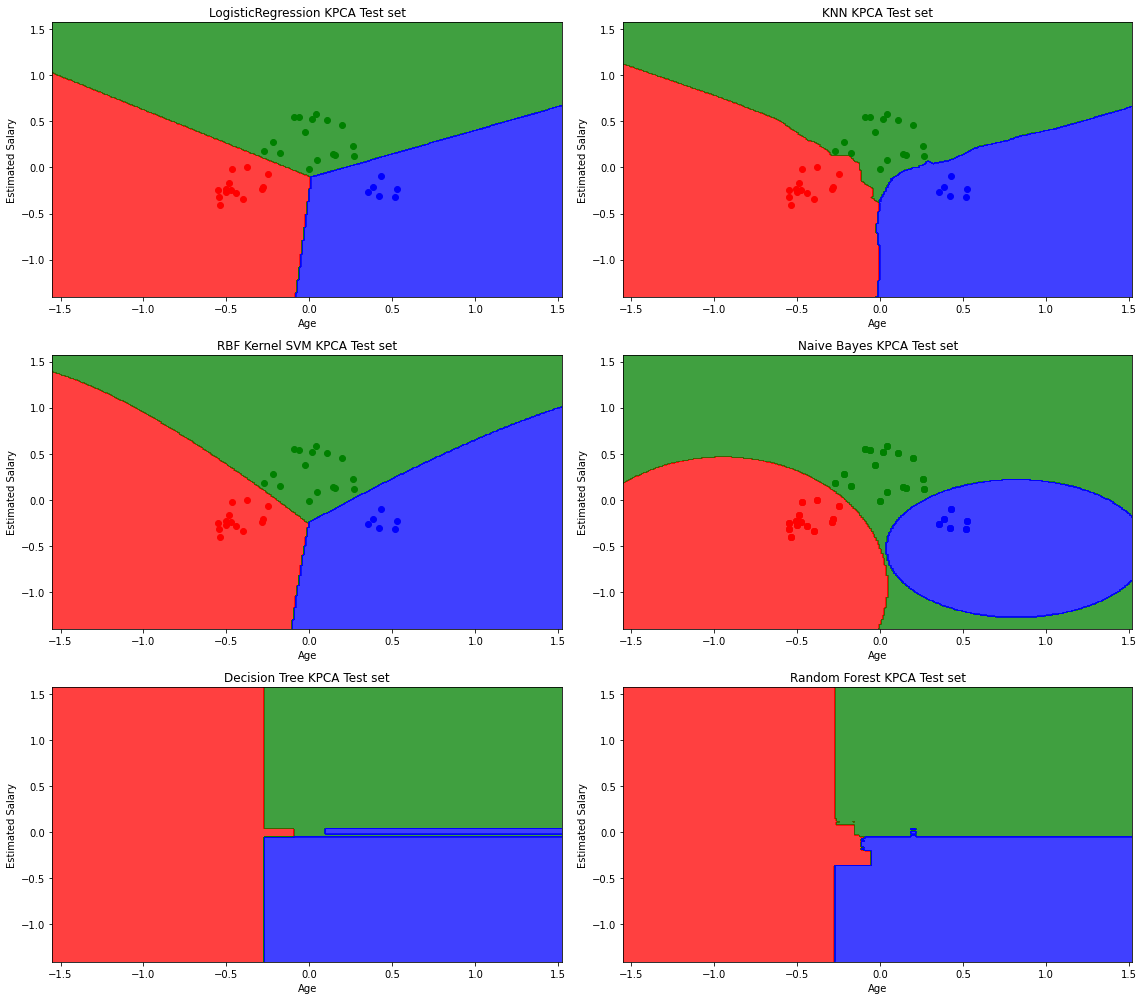

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
figure, ((axes1, axes2), (axes3, axes4), (axes5, axes6)) = plt.subplots(3, 2, figsize=(16,14))
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf3 = SVC(kernel = 'rbf',  gamma=0.5, C=1, random_state = 0)
clf4 = GaussianNB()
clf5 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)
clf6.fit(X_train, y_train)

axes1.contourf(X1, X2, clf1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes1.set_xlim(X1.min(), X1.max())
axes1.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes1.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes1.set_title('LogisticRegression KPCA Test set')
axes1.set_xlabel('Age')
axes1.set_ylabel('Estimated Salary')


axes2.contourf(X1, X2, clf2.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes2.set_xlim(X1.min(), X1.max())
axes2.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes2.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes2.set_title('KNN KPCA Test set')
axes2.set_xlabel('Age')
axes2.set_ylabel('Estimated Salary')


axes3.contourf(X1, X2, clf3.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes3.set_xlim(X1.min(), X1.max())
axes3.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes3.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes3.set_title('RBF Kernel SVM KPCA Test set')
axes3.set_xlabel('Age')
axes3.set_ylabel('Estimated Salary')


axes4.contourf(X1, X2, clf4.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes4.set_xlim(X1.min(), X1.max())
axes4.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes4.set_title('Naive Bayes KPCA Test set')
axes4.set_xlabel('Age')
axes4.set_ylabel('Estimated Salary')

axes5.contourf(X1, X2, clf5.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes5.set_xlim(X1.min(), X1.max())
axes5.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes5.set_title('Decision Tree KPCA Test set')
axes5.set_xlabel('Age')
axes5.set_ylabel('Estimated Salary')

axes6.contourf(X1, X2, clf6.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
axes6.set_xlim(X1.min(), X1.max())
axes6.set_ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    axes4.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = np.array(ListedColormap(('red', 'green', 'blue'))(i)))
axes6.set_title('Random Forest KPCA Test set')
axes6.set_xlabel('Age')
axes6.set_ylabel('Estimated Salary')
plt.tight_layout();